In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#カーネル密度関数に関する説明 
#https://ja.wikipedia.org/wiki/%E3%82%AB%E3%83%BC%E3%83%8D%E3%83%AB%E5%AF%86%E5%BA%A6%E6%8E%A8%E5%AE%9A

In [4]:
dataset1 = randn(25)

(0, 1)

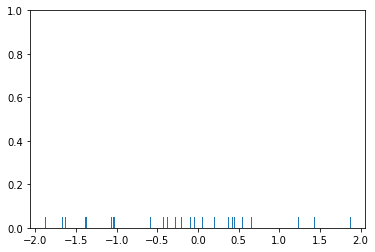

In [10]:
sns.rugplot(dataset1)
plt.ylim(0,1)

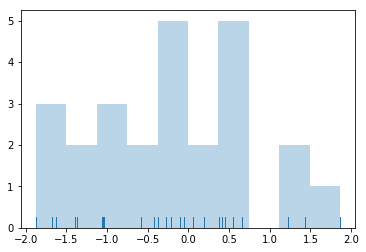

In [9]:
## ヒストグラムを重ねます。
plt.hist(dataset1,alpha=0.3)
sns.rugplot(dataset1)

In [11]:
#バンド幅の推定
#http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

(0, 1)

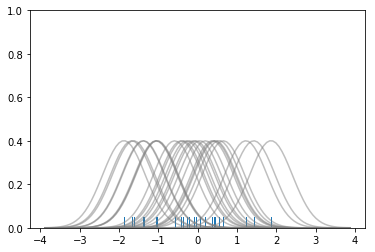

In [24]:
sns.rugplot(dataset1);

# X軸を競ってい
x_min = dataset1.min() - 2
x_max = dataset1.max() + 2

# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset1.std()**5)/(3*len(dataset1)))**.2

kernel_list = []
for data_point in dataset1:
    #pdf 確率密度関数
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

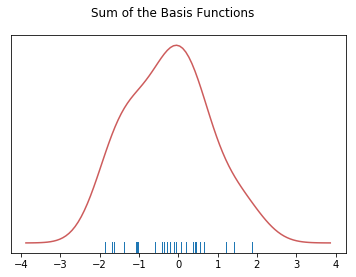

In [27]:
# 手動でKDEを作ります。
sum_of_kde = np.sum(kernel_list, axis = 0)

flg = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(dataset1)
#y軸のticksを表示してしないように空のリストを渡す
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

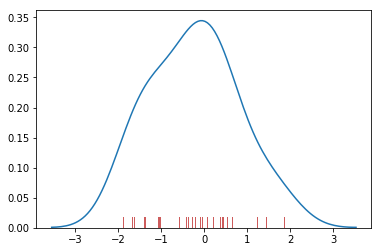

In [30]:
# これが1行で出来ます。
sns.kdeplot(dataset1)
sns.rugplot(dataset1,c = 'indianred')

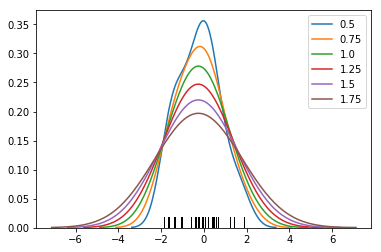

In [36]:
sns.rugplot(dataset1, color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5,2.0,0.25):
    sns.kdeplot(dataset1,bw=bw,label=bw)

In [37]:
#カーネル関数の説明（英語）
http://en.wikipedia.org/wiki/Kernel_(statistics)

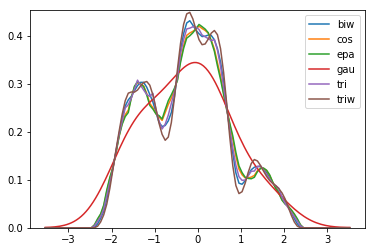

In [49]:
#デフォルトはgau
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset1,kernel=kern,label=kern)

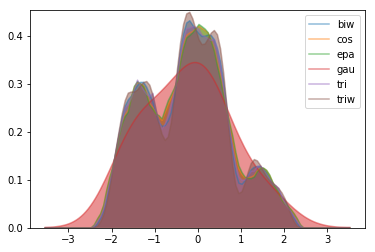

In [51]:
#
for kern in kernel_options:
    sns.kdeplot(dataset1,kernel=kern,label=kern,shade=True,alpha=0.5)

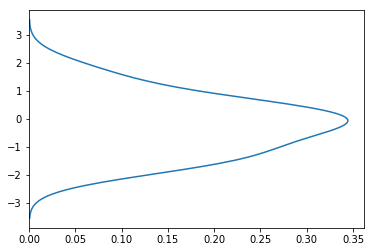

In [54]:
# 軸を入れ替えることもできます。
sns.kdeplot(dataset1,vertical=True)

In [55]:
#cumulative distribution function (CDF)
#累積分布関数
#http://en.wikipedia.org/wiki/Cumulative_distribution_function#

(array([  3.,   5.,   8.,  10.,  15.,  17.,  22.,  22.,  24.,  25.]),
 array([-1.87592187, -1.50177815, -1.12763443, -0.75349071, -0.37934699,
        -0.00520326,  0.36894046,  0.74308418,  1.1172279 ,  1.49137162,
         1.86551534]),
 <a list of 10 Patch objects>)

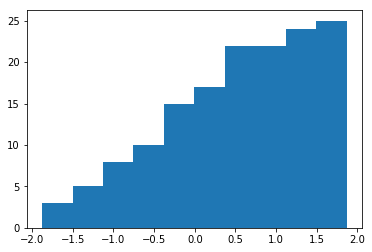

In [56]:
plt.hist(dataset1, cumulative=True)

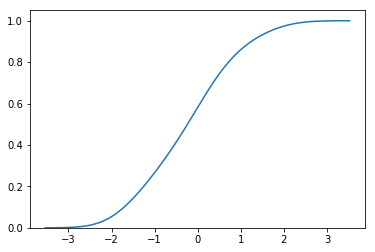

In [57]:
sns.kdeplot(dataset1,cumulative=True)

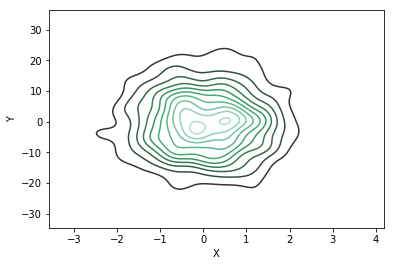

In [59]:
# 2次元平面上の中心
mean = [0,0]
# それぞれの分散を決めます。
cov = [[1,0],[0,100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe.X, dframe.Y)

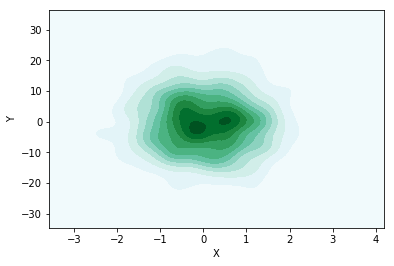

In [61]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

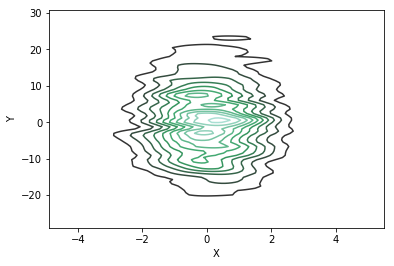

In [64]:
# バンド幅を変えられます。
sns.kdeplot(dframe.X, dframe.Y, bw = 0.7)

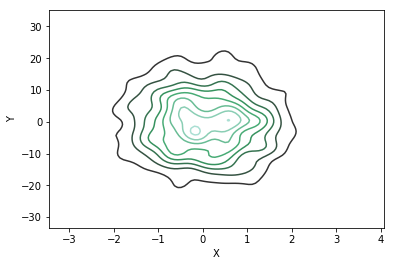

In [66]:
# バンドを文字列で指定する。
sns.kdeplot(dframe.X, dframe.Y, bw='silverman')

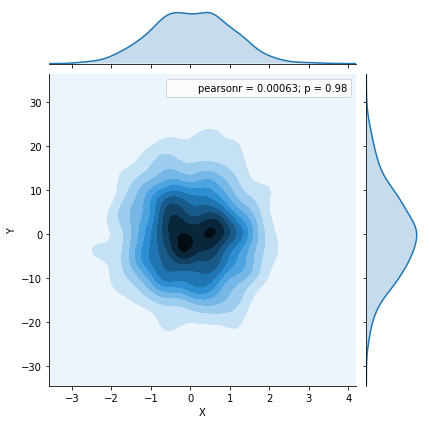

In [67]:
# 同時分布の推定も可能です。
sns.jointplot('X','Y',dframe,kind='kde')